In [10]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

# import torch
import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal
from mavi.util.preprocessing import Preprocessor

In [11]:
print(sys.executable)

/home/bosg/Documents/py-envs/edvenv/bin/python


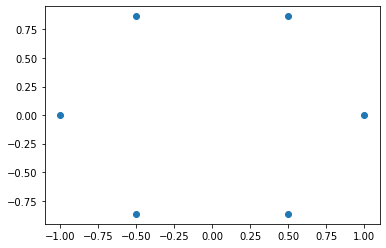

In [12]:
theta = [np.pi*i/3 for i in range(6)]
X = np.vstack((np.cos(theta), np.sin(theta))).T

plt.plot(X[:,0], X[:,1], "o")

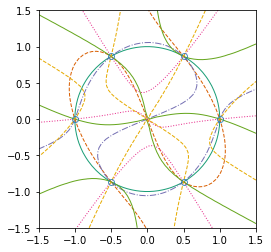

In [13]:
vi = VanishingIdeal()
vi.fit(X, 0.01, method="vca", backend='numpy')
vi.plot(X)

In [14]:
X = np.repeat(X, 1000, axis=0)
Z = np.repeat(X, 20, axis=1)
print(X.shape, Z.shape)

(6000, 2) (6000, 40)


----------------------
top 0 components has 95.0% power in total
correpsonding range of epsilon is (244.94897427831668, 244.94897427831876) (mean: 244.94897427831773)
----------------------
(6000, 1)
1
0.95
0.95
CPU times: user 9.89 s, sys: 1.07 s, total: 11 s
Wall time: 1.56 s


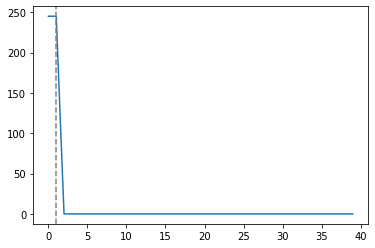

In [16]:
%%time
'''
Preprocessing remove redundant variables 
'''
pre = Preprocessor()
Z_ = pre.fit_transform(Z, th=.95, keep_dim=False)  # PCA-like preprocessing, 95% of power is kept.
print(Z_.shape)
print(pre.th_id)
print(pre.th)
print(pre.th)
plt.plot(pre.d)
plt.axvline(x=pre.th_id, linestyle='--', color='grey')




### Comparison in VCA

In [19]:
%%time
'''
Computation for 2-dim dataset X
'''
vi = VanishingIdeal()
vi.fit(X, 0.01, method="vca", backend='numpy')  

CPU times: user 3.92 s, sys: 2.36 s, total: 6.28 s
Wall time: 1.35 s


In [20]:
%%time
'''
Computation for 40-dim dataset Z
'''
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="vca", backend='numpy')  

CPU times: user 12 s, sys: 3.82 s, total: 15.8 s
Wall time: 2.94 s


In [21]:
%%time
'''
Computation for preprocessed 2-dim dataset Z_
'''
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="vca", backend='numpy')  

CPU times: user 981 ms, sys: 788 ms, total: 1.77 s
Wall time: 563 ms


### Comparison in Grad

In [22]:
%%time
'''
Computation for 2-dim dataset X
'''
vi = VanishingIdeal()
vi.fit(X, 0.01, method="grad", backend='numpy')  

CPU times: user 26.2 ms, sys: 40.7 ms, total: 66.9 ms
Wall time: 14.6 ms


In [23]:
%%time
'''
Computation for 40-dim dataset Z
'''
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="grad", backend='numpy')  

CPU times: user 570 ms, sys: 807 ms, total: 1.38 s
Wall time: 210 ms


In [24]:
%%time
'''
Computation for preprocessed 2-dim dataset Z_
'''
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="grad", backend='numpy')  

CPU times: user 0 ns, sys: 9.86 ms, total: 9.86 ms
Wall time: 2.12 ms


### Plot

CPU times: user 1.59 s, sys: 229 ms, total: 1.82 s
Wall time: 1.48 s


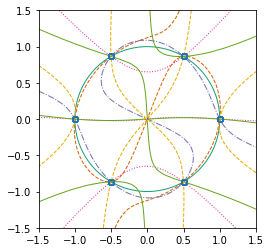

In [32]:
%%time
'''
Don't forget to apply ```pre.transform```
'''
vi = VanishingIdeal()
# vi.fit(Z_, 0.01, method="grad", backend='numpy')
vi.fit(X, 0.01, method="grad", backend='numpy')
# vi.plot(pre.transform(Z))
# vi.plot(pre.transform(X))
vi.plot(X)

